In [1]:
!pip install pandas-datareader
!pip install yfinance

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime
import os
import yfinance as yf
yf.pdr_override()
import statsmodels
from statsmodels.tsa.stattools import coint

In [11]:
final_companies = pd.read_csv('final_stocks_data.csv')
final_companies_nd = final_companies.drop_duplicates(subset ="Symbl",
                     keep = 'first', inplace= False)
final_companies_nd.reset_index(inplace=True)
del final_companies_nd['index']
final_companies_nd

,Symbl
0,COFORGE.NS
1,HCLTECH.NS
2,DIVISLAB.NS
3,ATGL.NS
4,MINDTREE.NS
5,MPHASIS.NS
6,INFY.NS
7,TATACONSUM.NS
8,ADANITRANS.NS
9,TCS.NS


In [12]:
start = datetime(2018,11,5)
end = datetime(2022,2,1)

In [13]:
#This function returns a pd dataframe with all of the adjusted closing information
def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=start, end=end).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    print(names)
    return data

ticks = final_companies_nd['Symbl'].tolist()
d = get_historical_Data(ticks)
print(d.shape)
d.tail()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
['COFORGE.NS', 'HCLTECH.NS', 'DIVISLAB.NS', 'ATGL.NS', 'MINDTREE.NS', 'MPHASIS.NS', 'INFY.NS', 'TATACONSUM.NS', 'ADANITRANS.NS', 'TCS.NS']
(799, 10)


,COFORGE.NS,HCLTECH.NS,DIVISLAB.NS,ATGL.NS,MINDTREE.NS,MPHASIS.NS,INFY.NS,TATACONSUM.NS,ADANITRANS.NS,TCS.NS
Date,,,,,,,,,,
2022-01-21,5200.350098,1167.949951,4179.399902,1827.300049,4118.850098,3024.600098,1785.699951,726.549988,2066.800049,3833.500000
2022-01-24,4824.950195,1124.900024,4056.600098,1781.150024,3888.949951,2947.350098,1736.800049,691.450012,2035.900024,3771.350098
2022-01-25,4781.649902,1123.699951,4049.199951,1825.199951,3827.199951,3062.250000,1722.150024,707.750000,1992.449951,3769.899902
2022-01-27,4400.799805,1077.750000,3939.850098,1830.750000,3585.199951,2934.000000,1678.599976,705.950012,2009.300049,3649.250000
2022-01-28,4713.250000,1080.449951,3940.699951,1830.900024,3724.199951,3039.300049,1686.199951,717.900024,1986.800049,3690.050049


In [14]:
d

,COFORGE.NS,HCLTECH.NS,DIVISLAB.NS,ATGL.NS,MINDTREE.NS,MPHASIS.NS,INFY.NS,TATACONSUM.NS,ADANITRANS.NS,TCS.NS
Date,,,,,,,,,,
2018-11-05,1164.830566,481.308960,1434.431641,75.243607,755.219299,870.589966,610.962463,214.630905,182.250000,1773.829224
2018-11-06,1134.123291,485.151917,1445.534058,77.731827,766.935547,841.331421,611.375366,208.724518,178.600006,1813.089111
2018-11-07,1137.330200,486.401489,1464.803833,80.916748,768.773438,859.265564,619.677429,210.091293,179.199997,1821.954346
2018-11-09,1137.524414,484.680420,1515.130371,79.573105,785.038269,876.367615,604.999695,204.526596,176.300003,1791.043579
2018-11-12,1158.562866,488.877014,1478.742676,75.641724,793.400696,897.259949,609.311279,209.603149,171.750000,1796.343872
...,...,...,...,...,...,...,...,...,...,...
2022-01-21,5200.350098,1167.949951,4179.399902,1827.300049,4118.850098,3024.600098,1785.699951,726.549988,2066.800049,3833.500000
2022-01-24,4824.950195,1124.900024,4056.600098,1781.150024,3888.949951,2947.350098,1736.800049,691.450012,2035.900024,3771.350098
2022-01-25,4781.649902,1123.699951,4049.199951,1825.199951,3827.199951,3062.250000,1722.150024,707.750000,1992.449951,3769.899902


In [15]:
# creating a function to find cointegrated pairs among the 10 companies sorted above
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

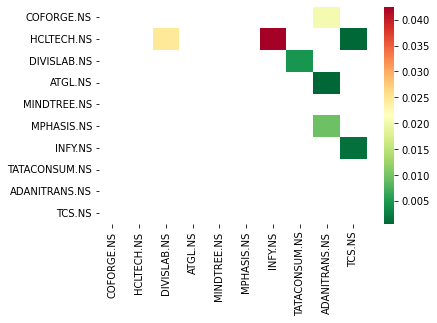

[('COFORGE.NS', 'ADANITRANS.NS'), ('HCLTECH.NS', 'DIVISLAB.NS'), ('HCLTECH.NS', 'INFY.NS'), ('HCLTECH.NS', 'TCS.NS'), ('DIVISLAB.NS', 'TATACONSUM.NS'), ('ATGL.NS', 'ADANITRANS.NS'), ('MPHASIS.NS', 'ADANITRANS.NS'), ('INFY.NS', 'TCS.NS')]
8


In [60]:
# Heatmap to show the p-values of the cointegration test between each pair of stocks
scores, pvalues, pairs = find_cointegrated_pairs(d)
import seaborn

names = final_companies_nd['Symbl'].tolist()
m = np.arange(0, 1, 0.05).tolist()
seaborn.heatmap(pvalues, xticklabels=names, 
                yticklabels=names, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05))
plt.show()
print(pairs)
print(len(pairs))

Text(0.5, 0.98, 'Comparing Historical Adjusted Closing Prices')

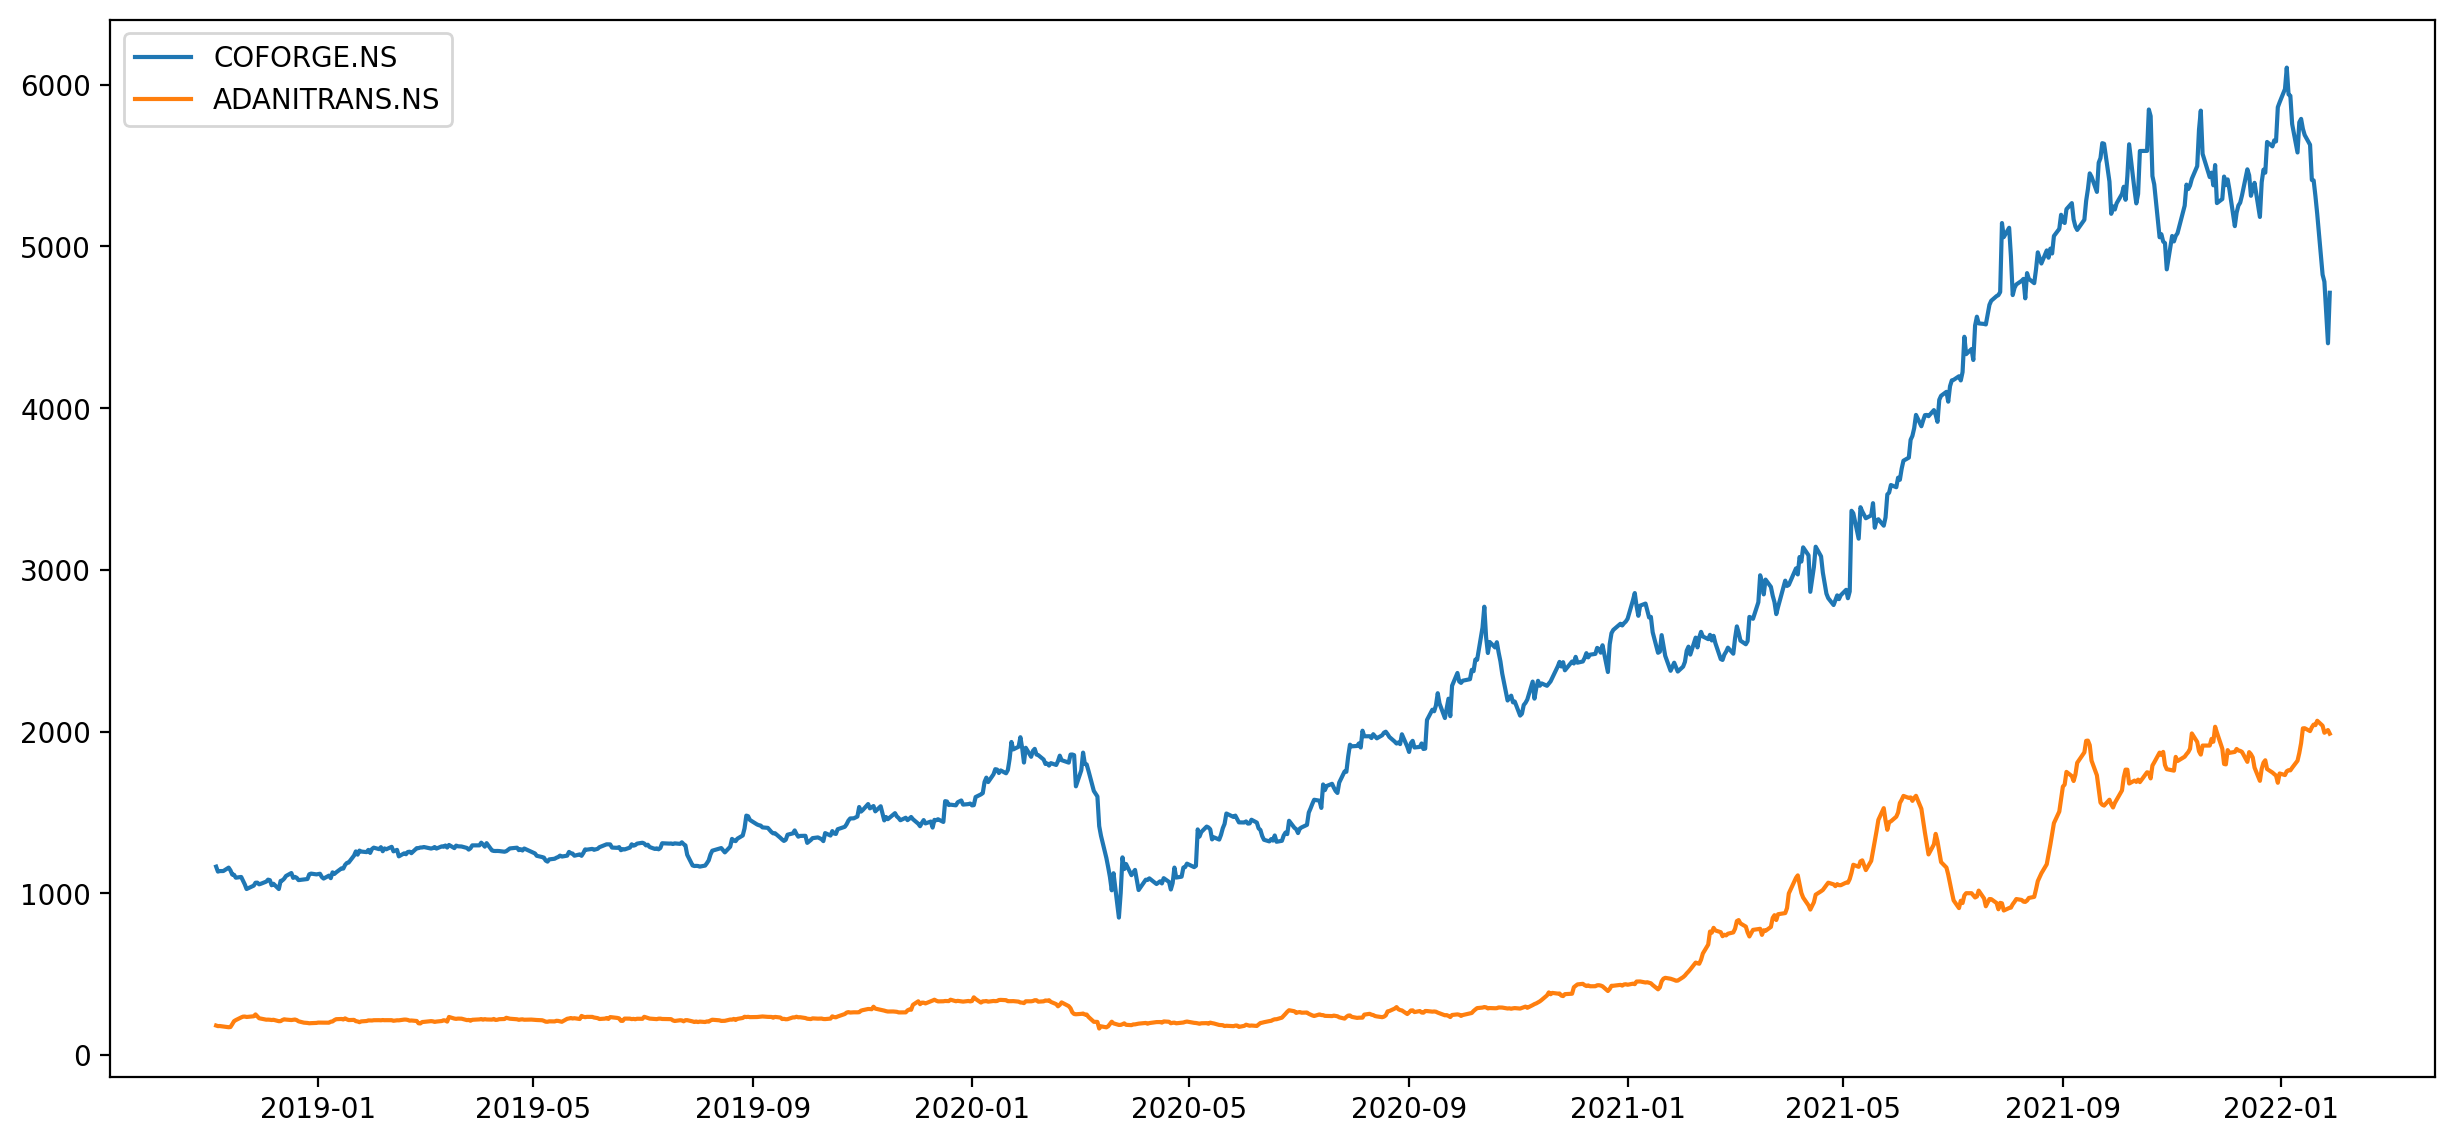

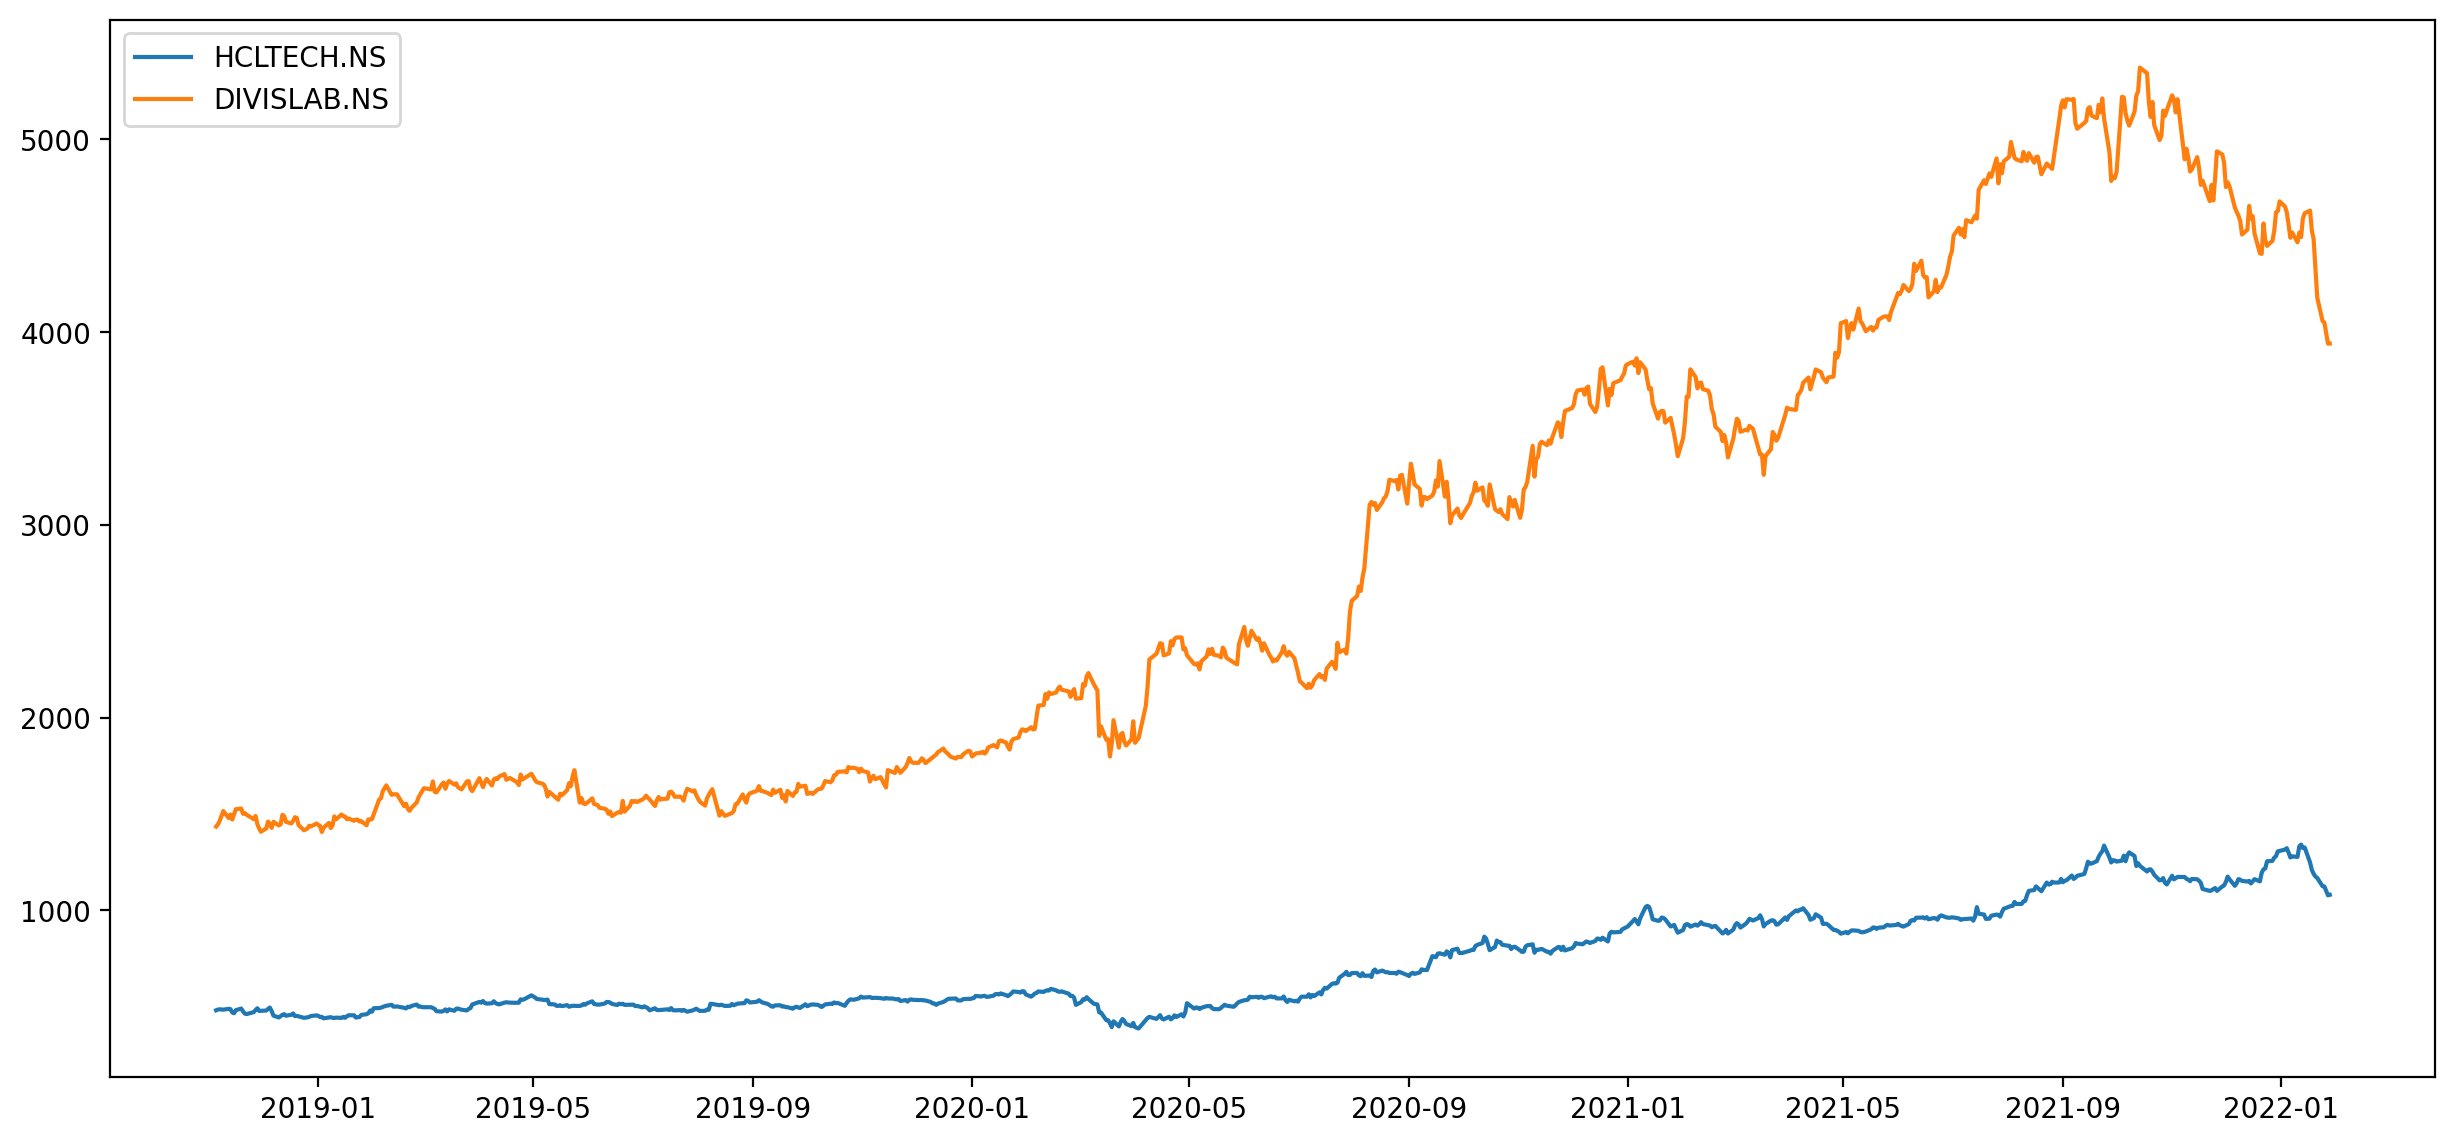

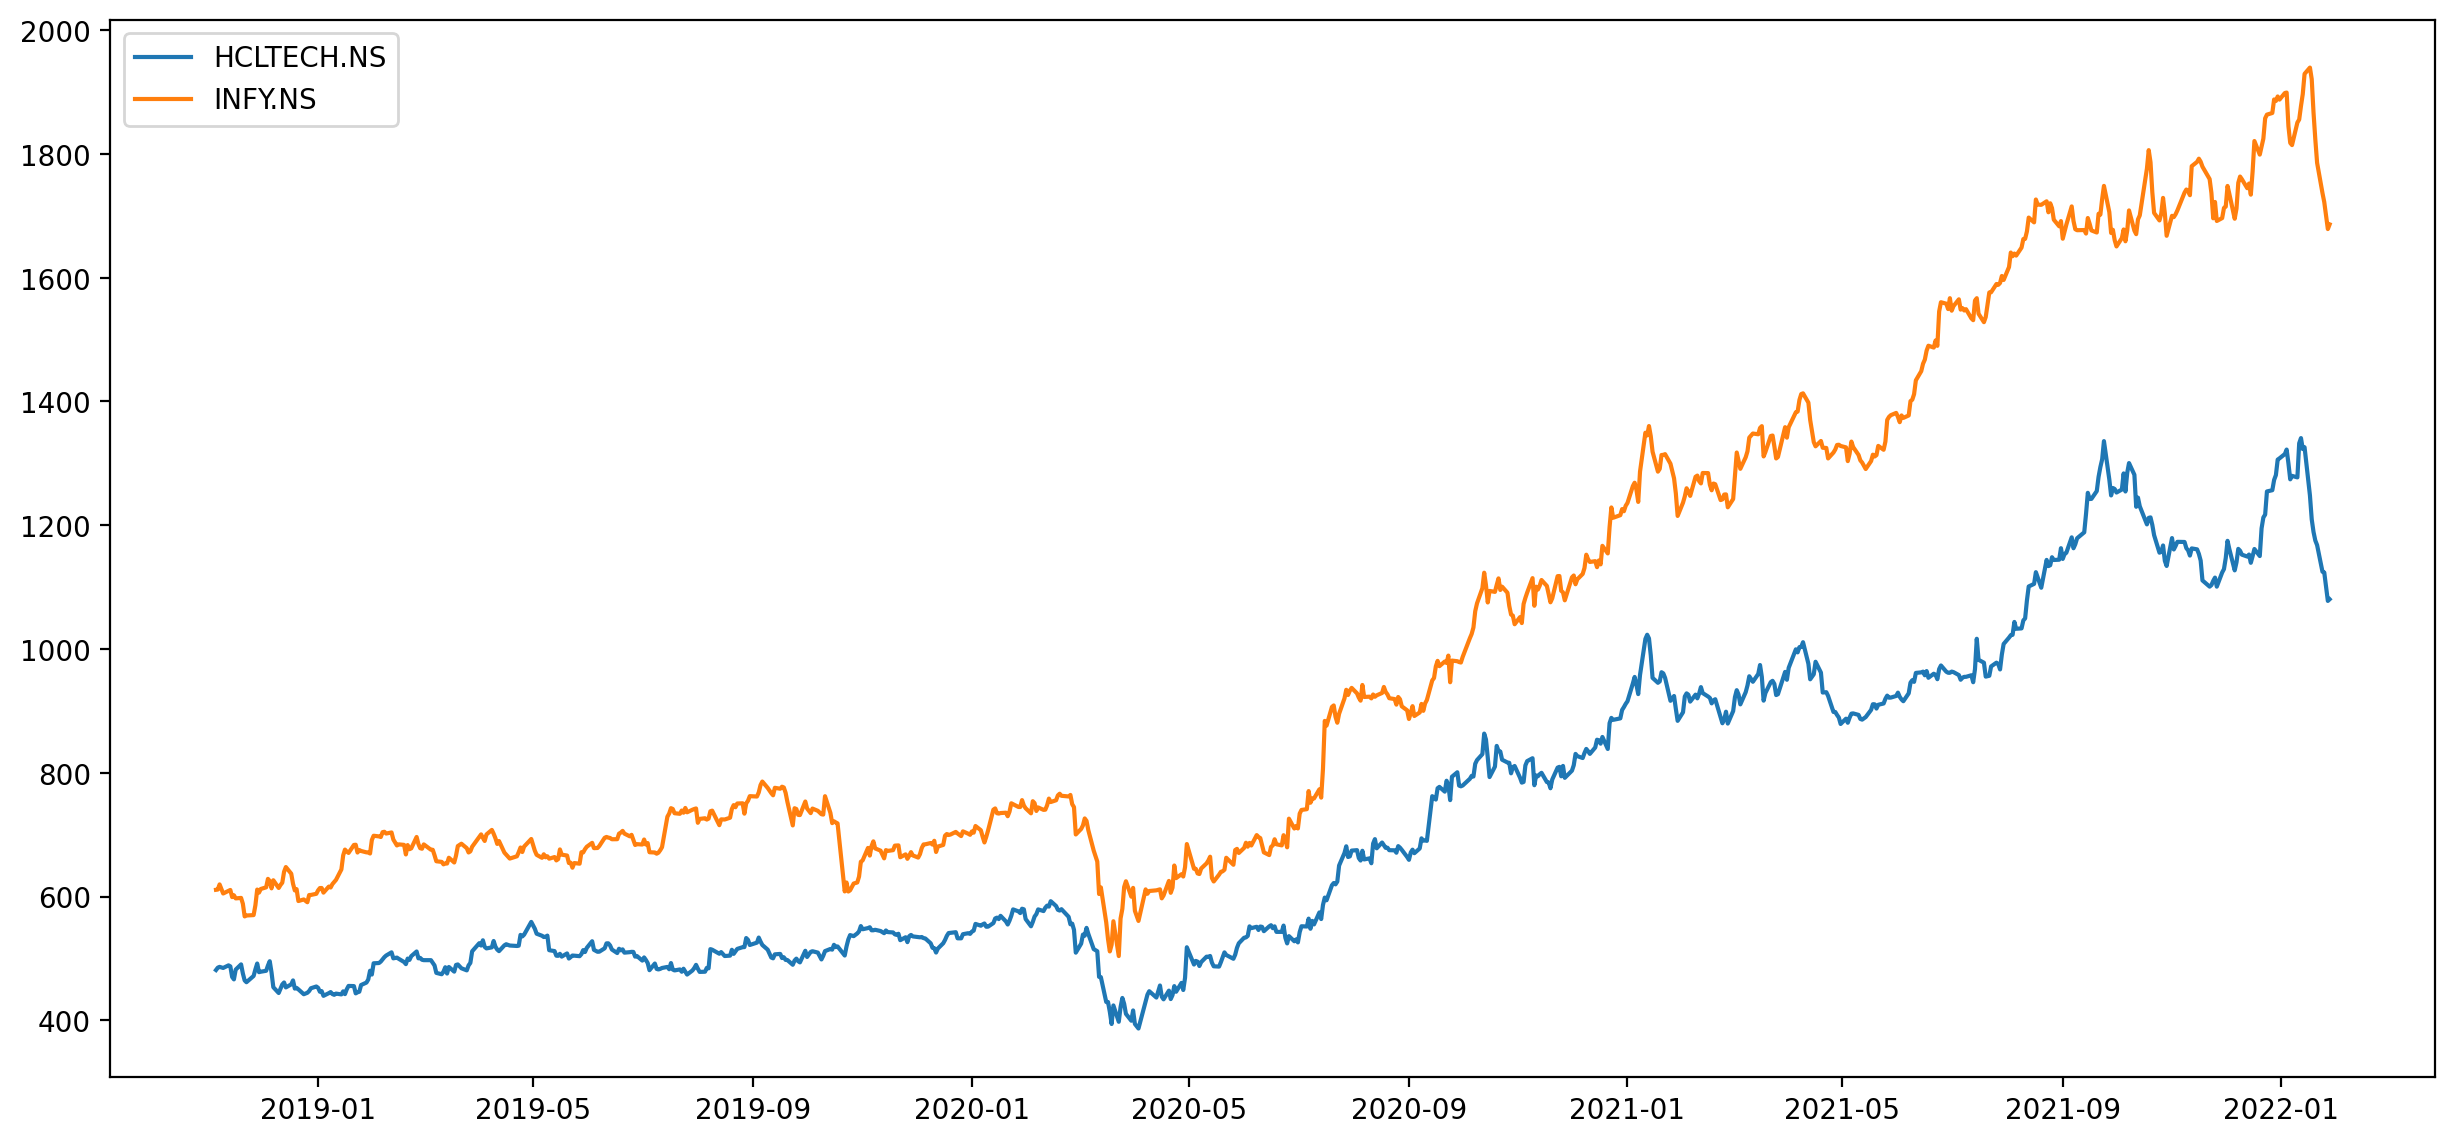

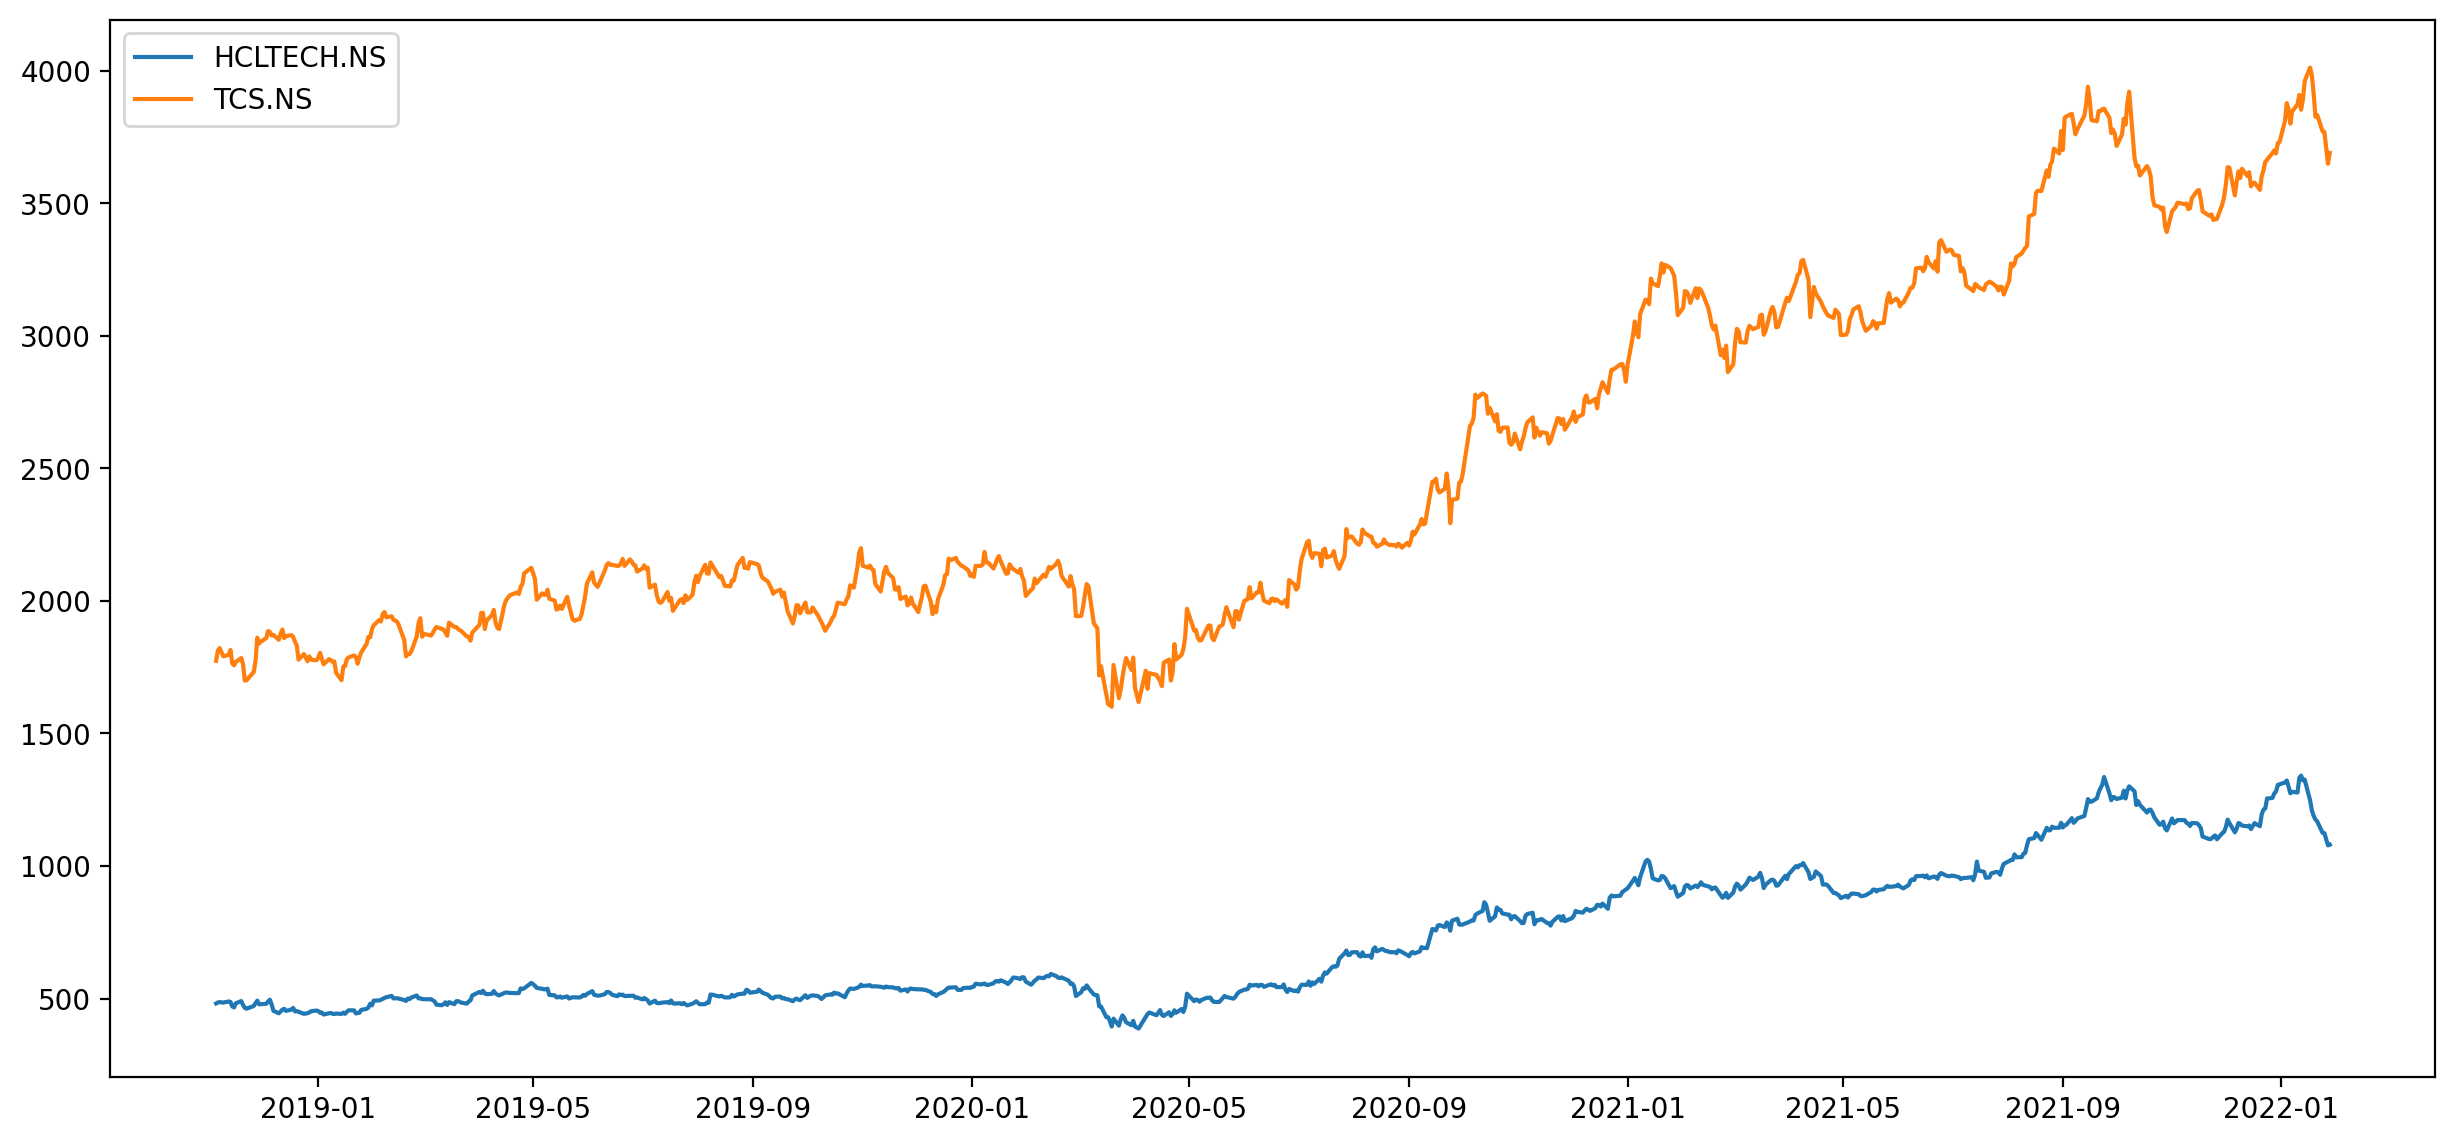

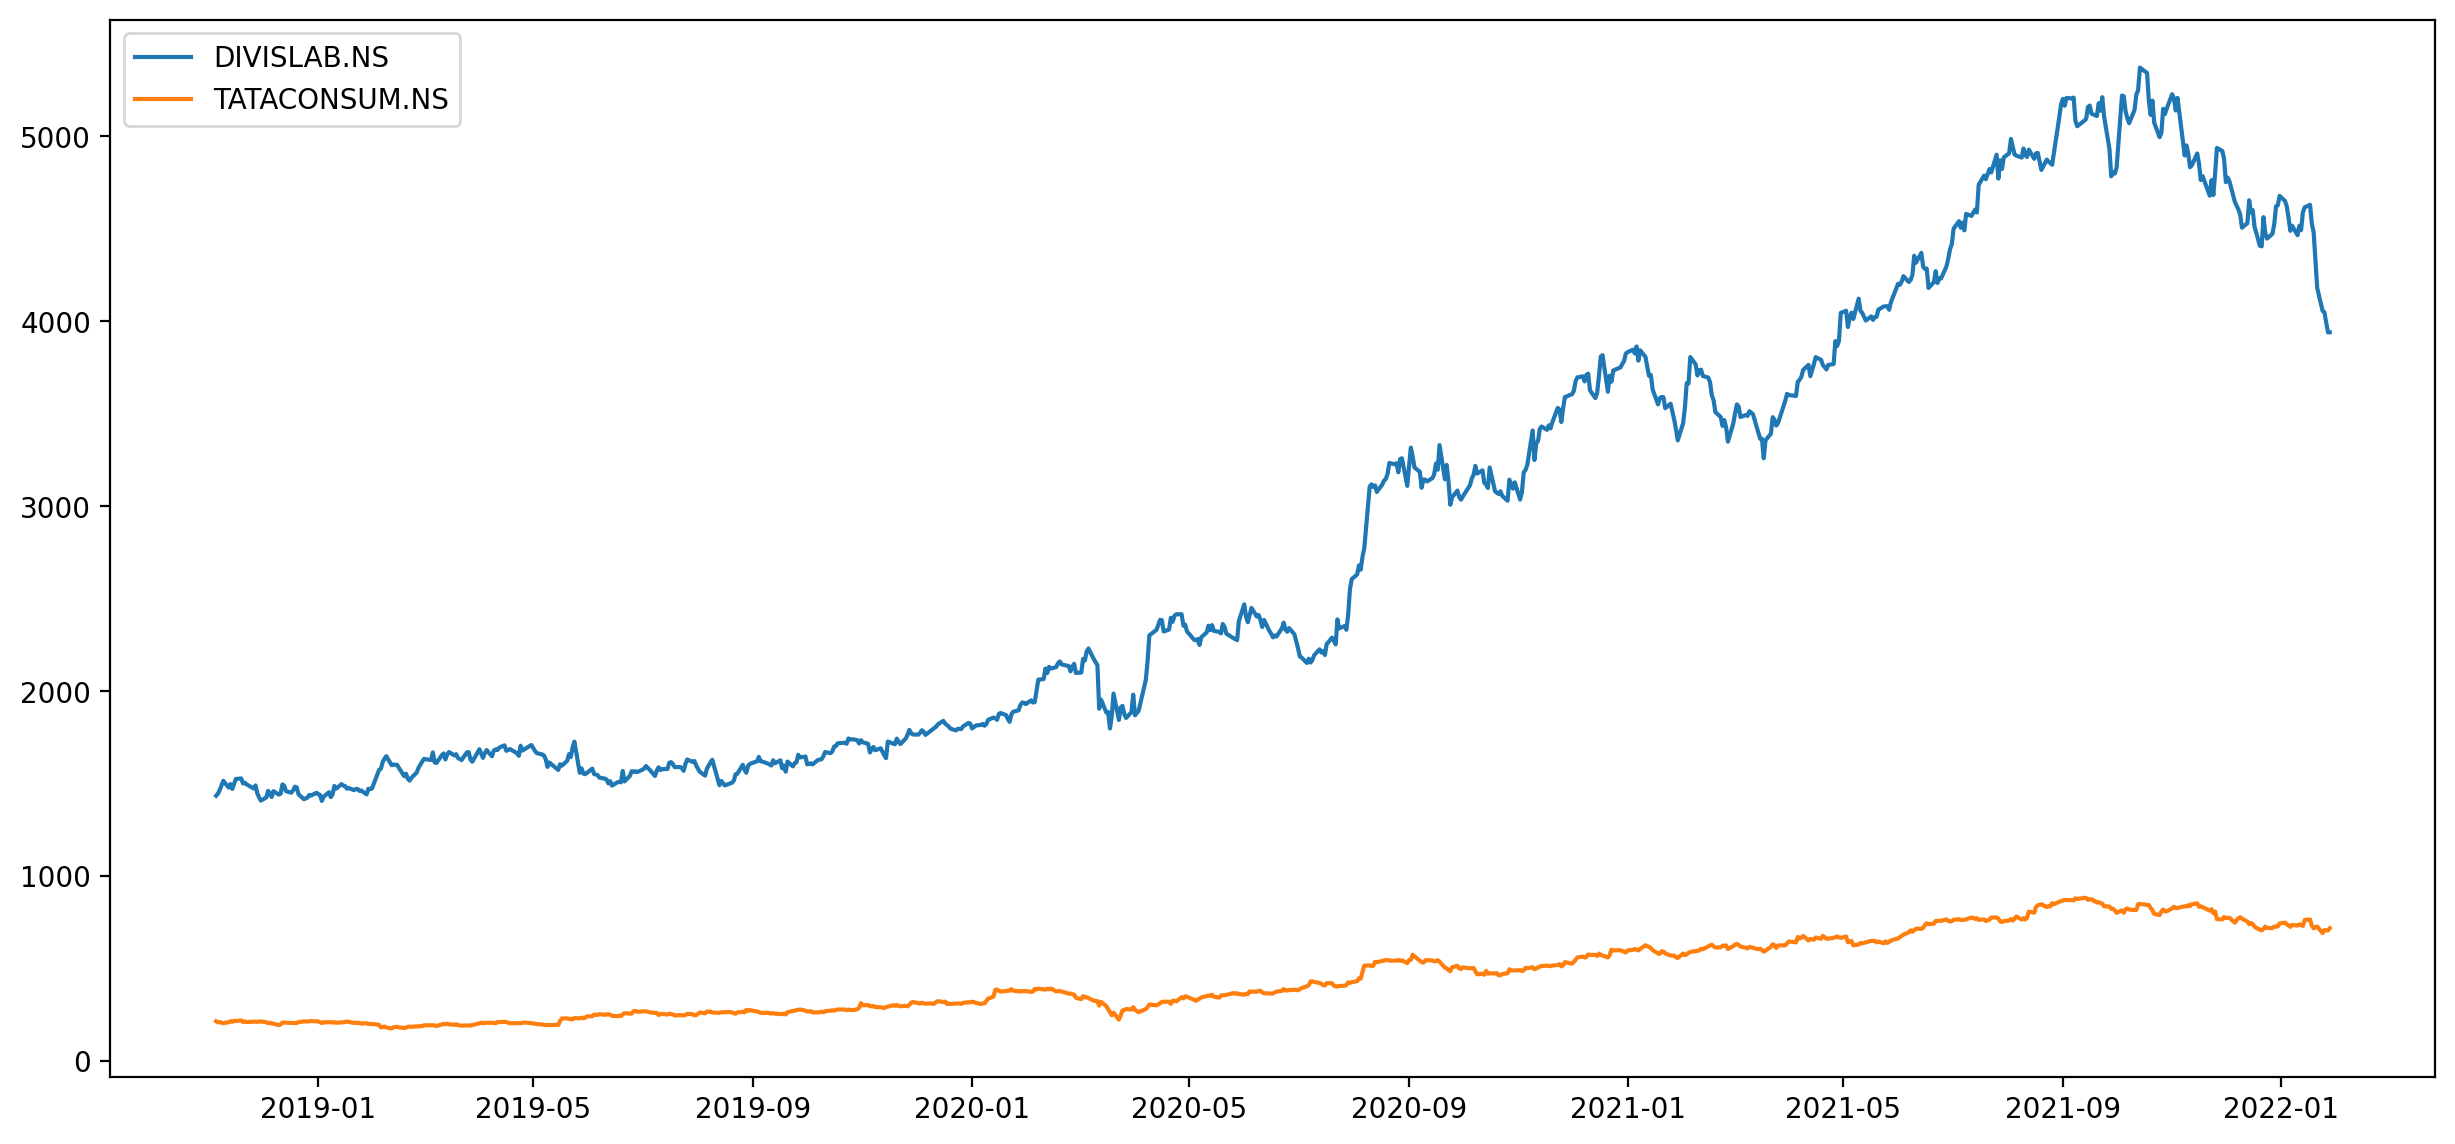

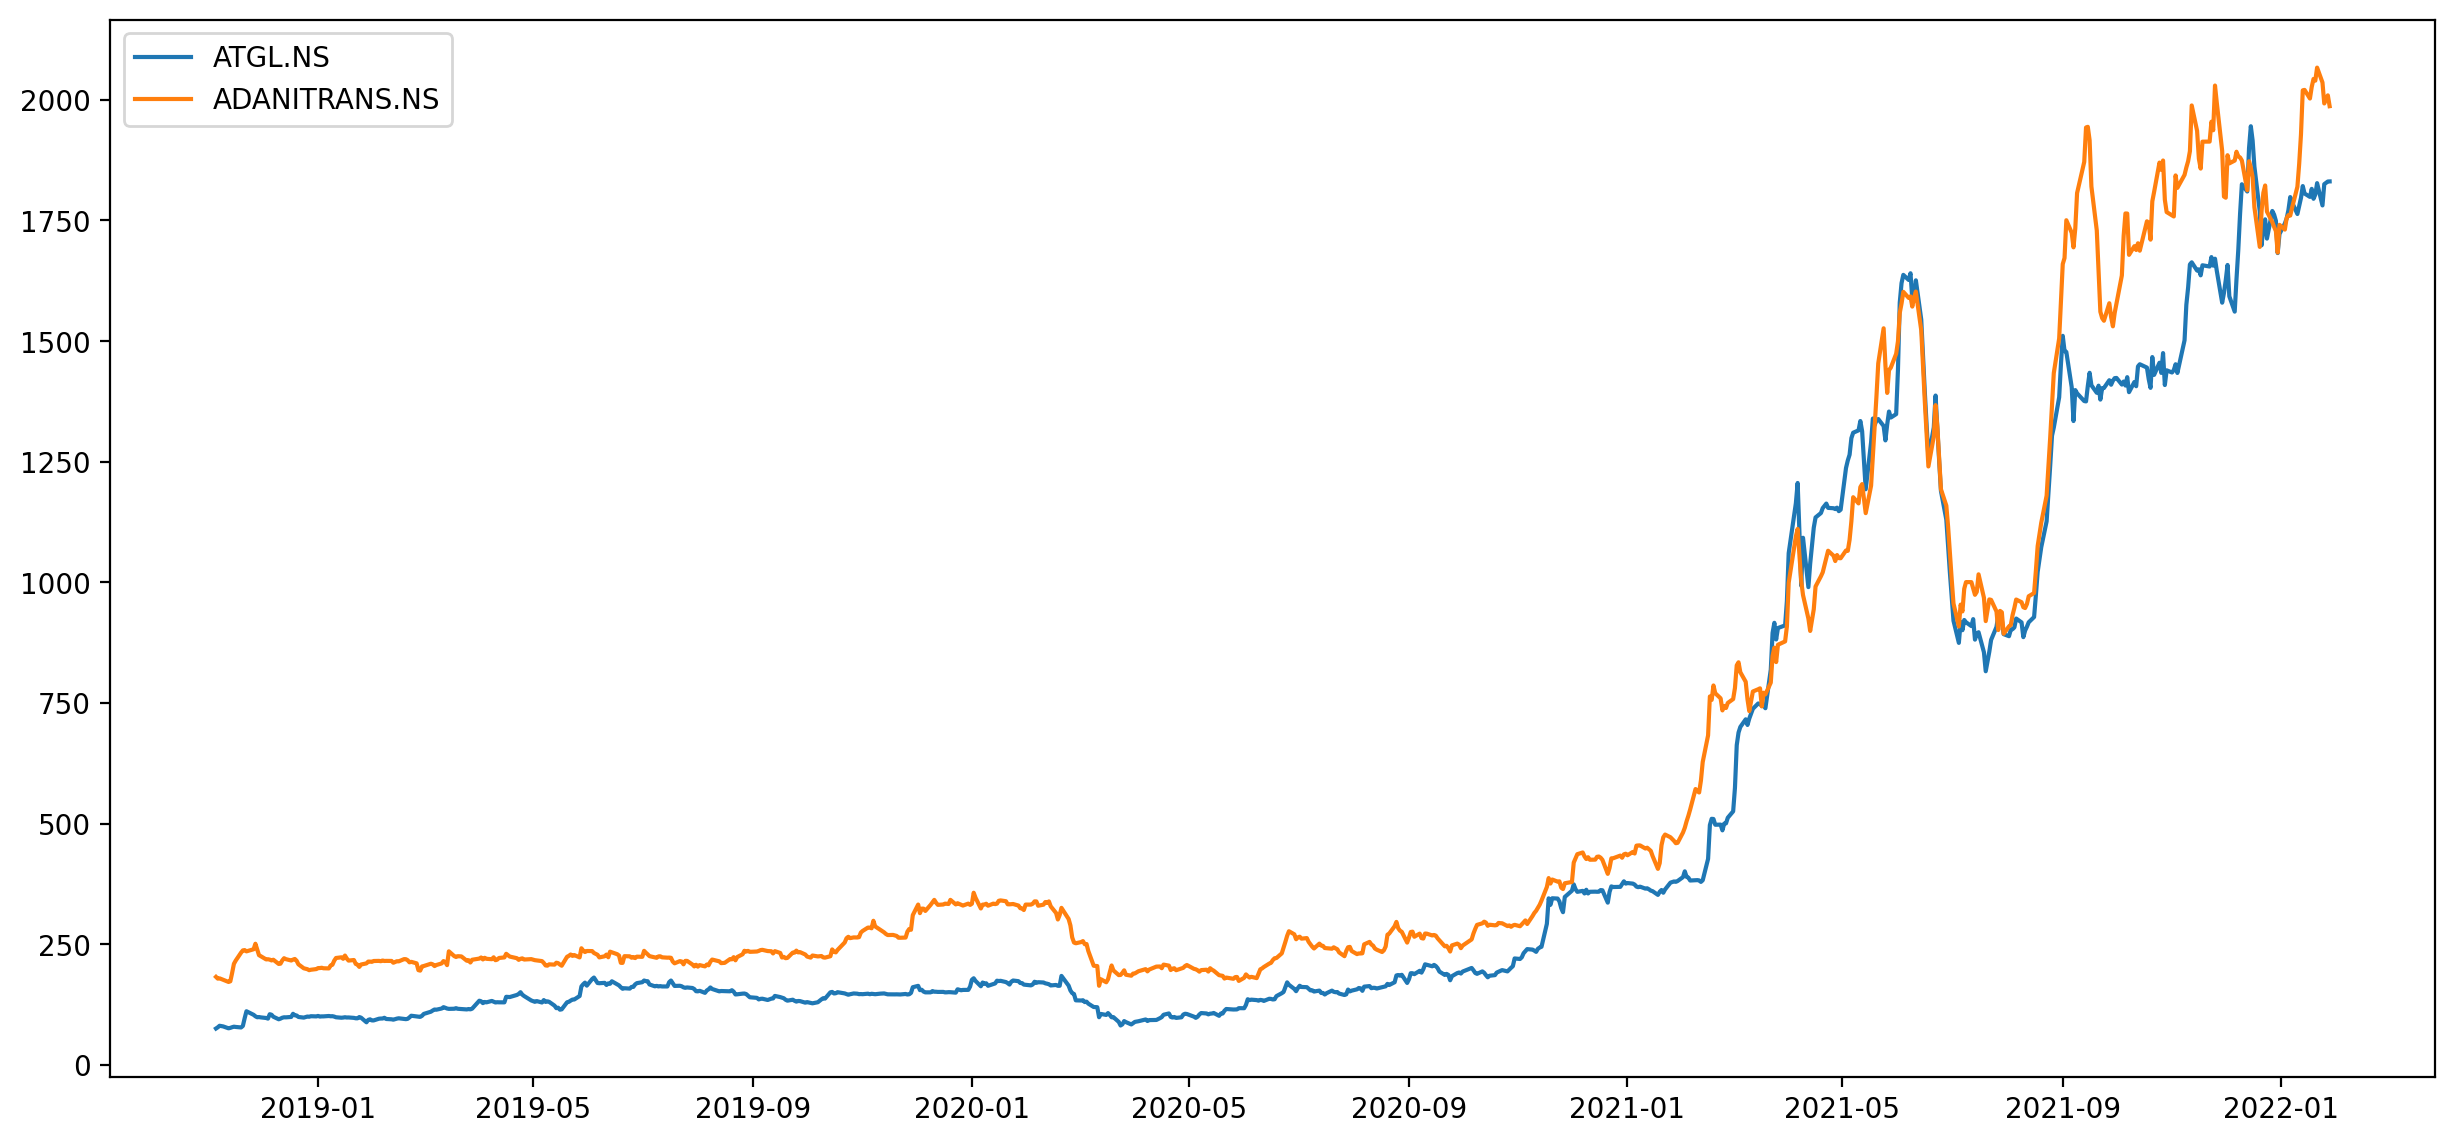

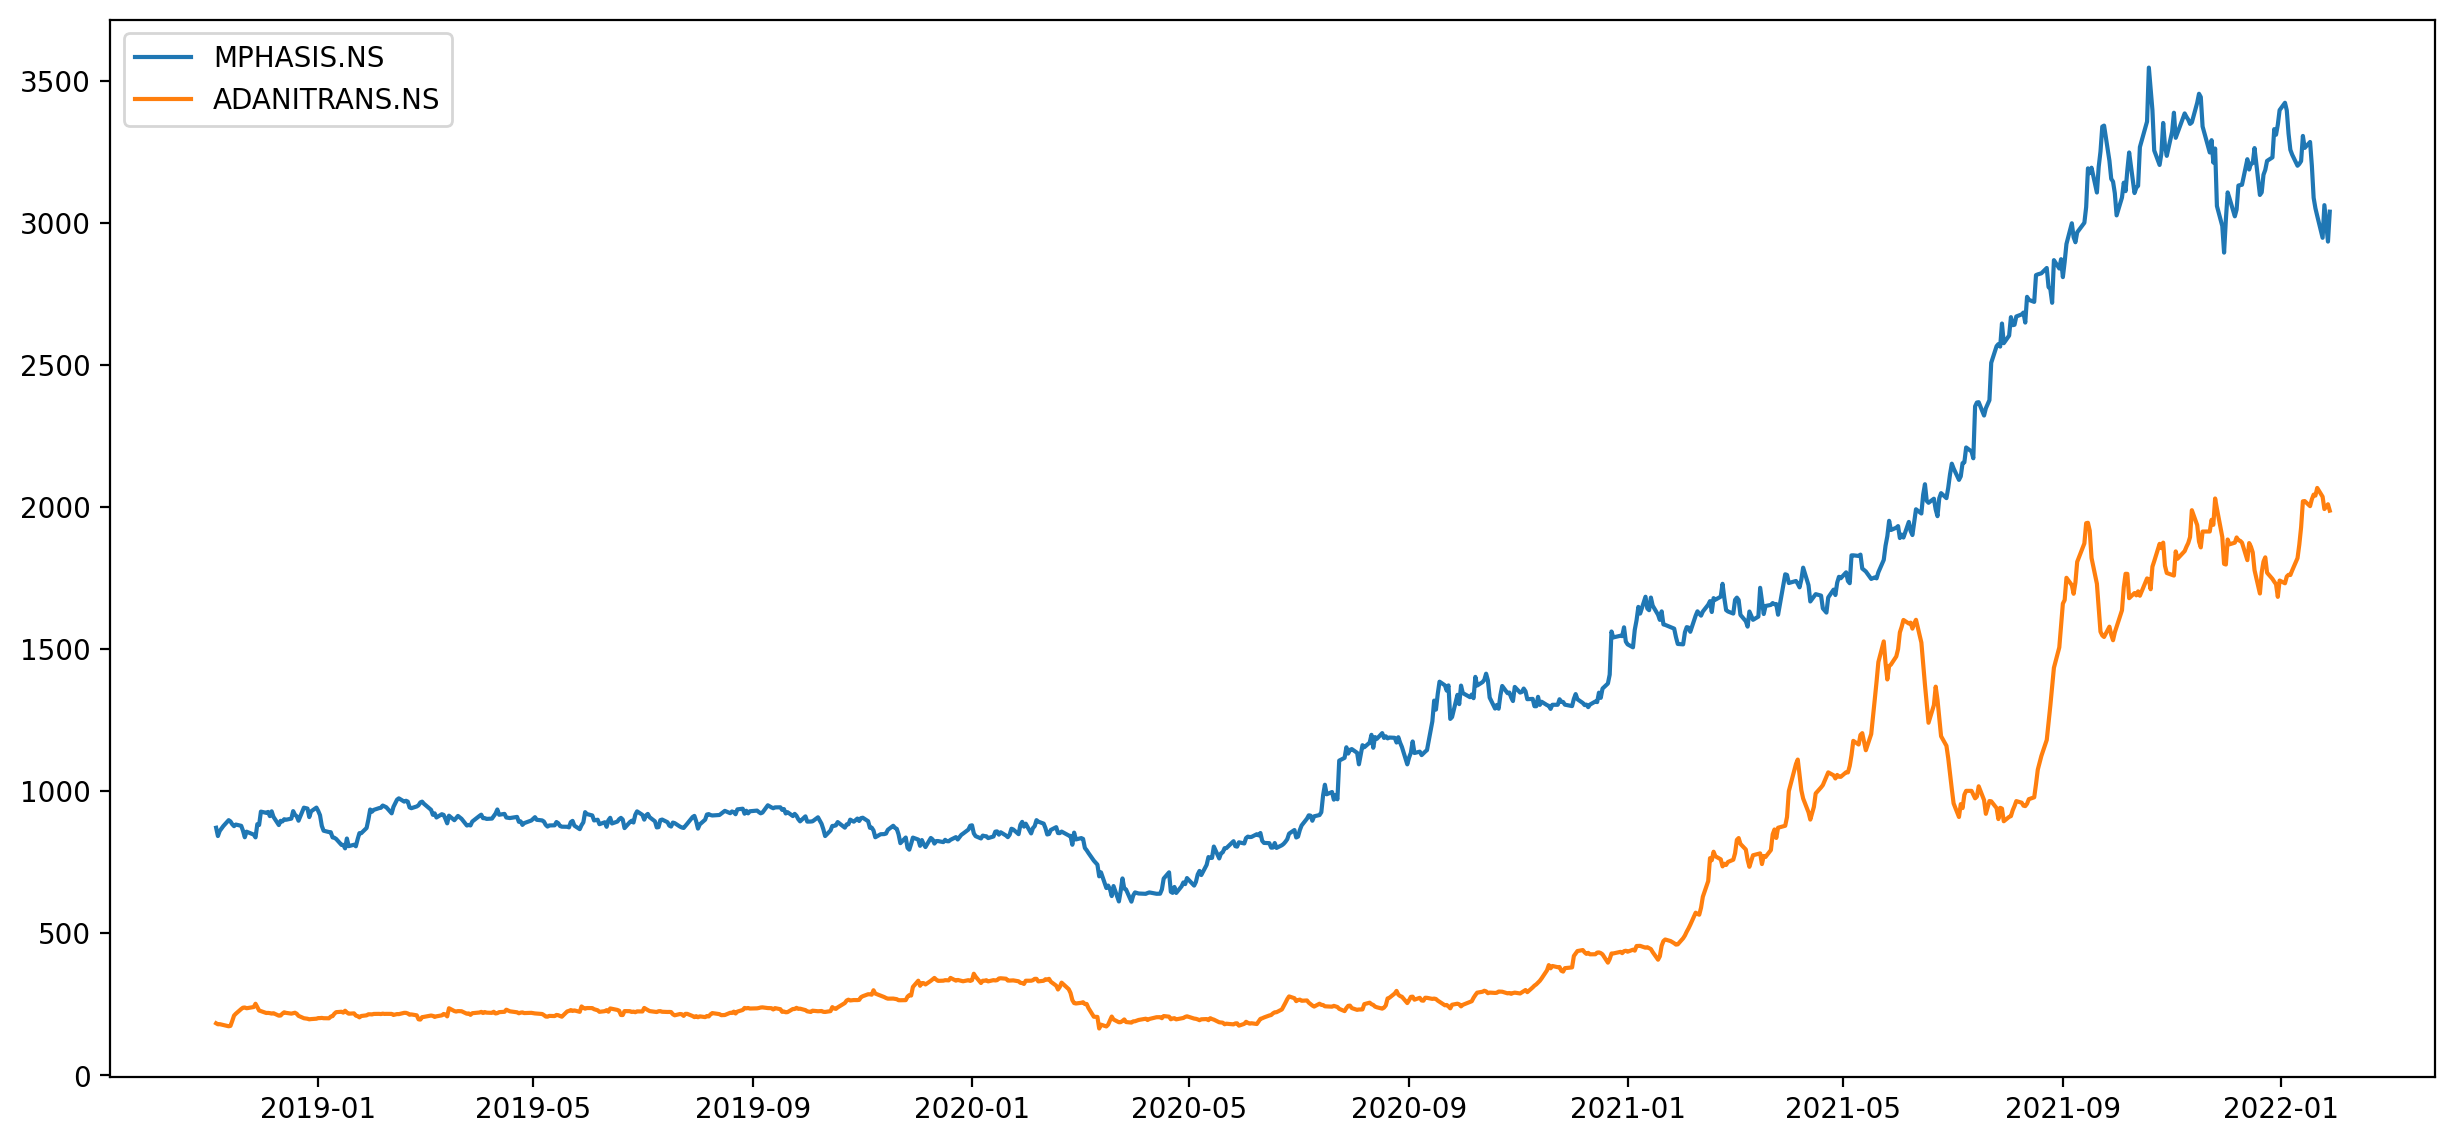

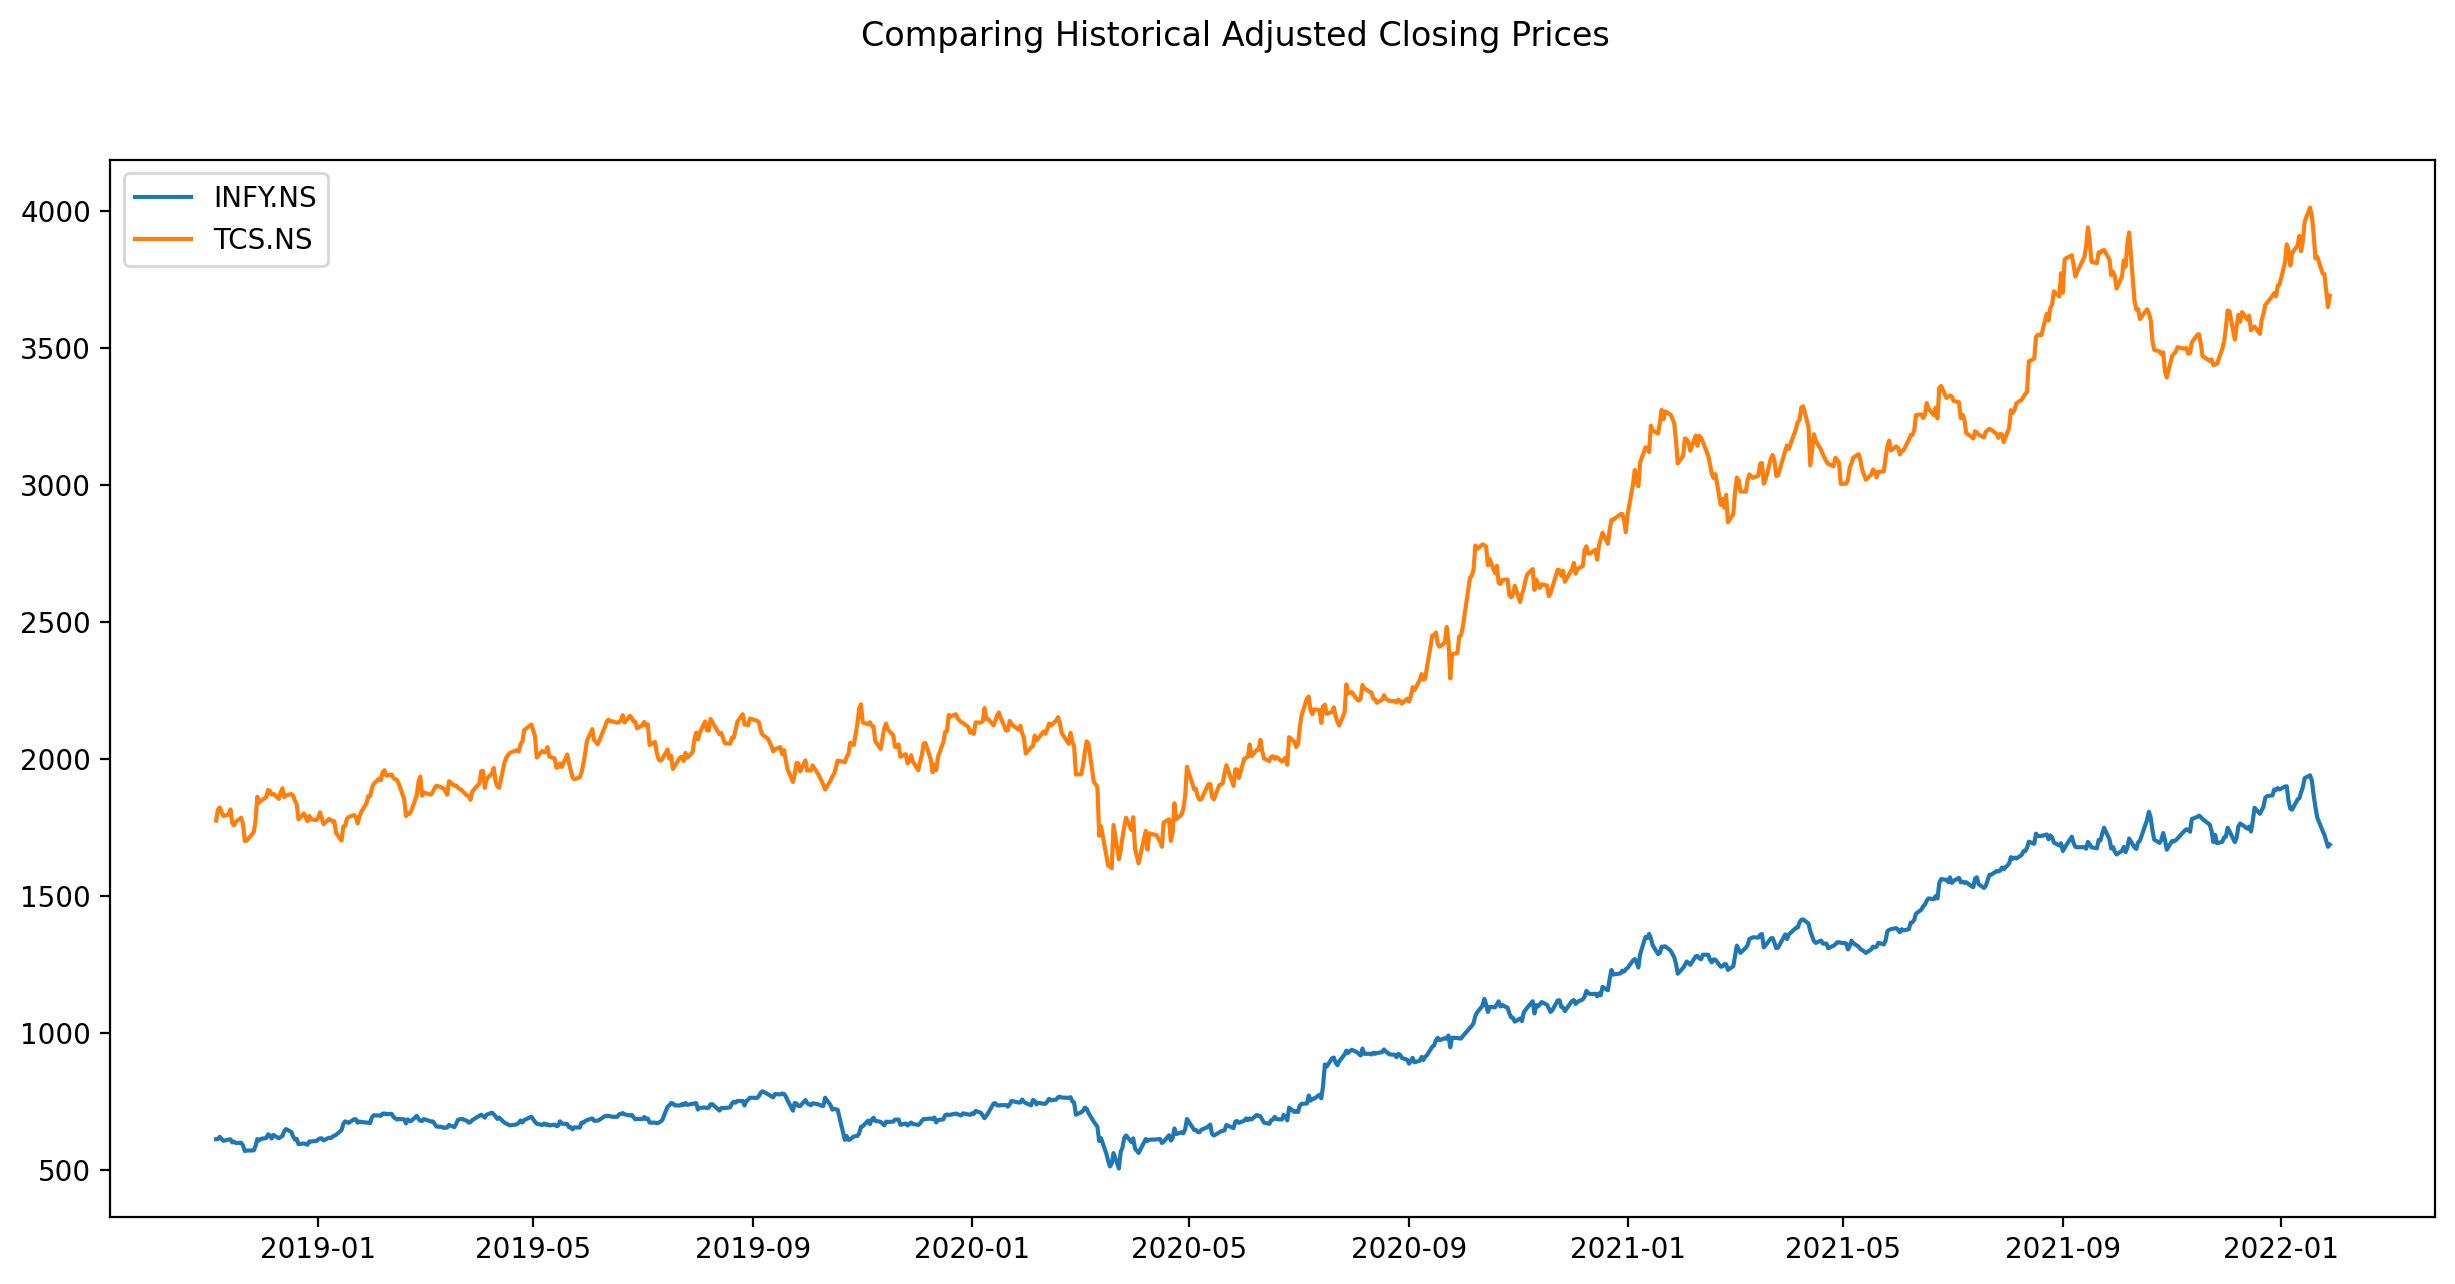

In [61]:
for pair in pairs:
    plt.figure(figsize=(15,7), dpi=200)
    S1 = d[pair[0]]
    plt.plot(S1, label = f"{pair[0]}")
    S2 = d[pair[1]]
    plt.plot(S2, label = f"{pair[1]}")
    plt.legend()
    
plt.suptitle('Comparing Historical Adjusted Closing Prices') 

0.000580144749103092


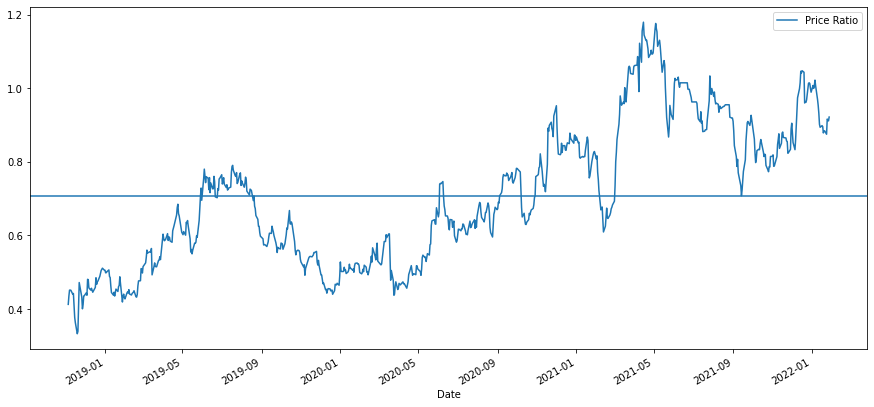

In [42]:
S1 = d['ATGL.NS']
S2 = d['ADANITRANS.NS']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean())
plt.legend(['Price Ratio'])
plt.show()

In [43]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


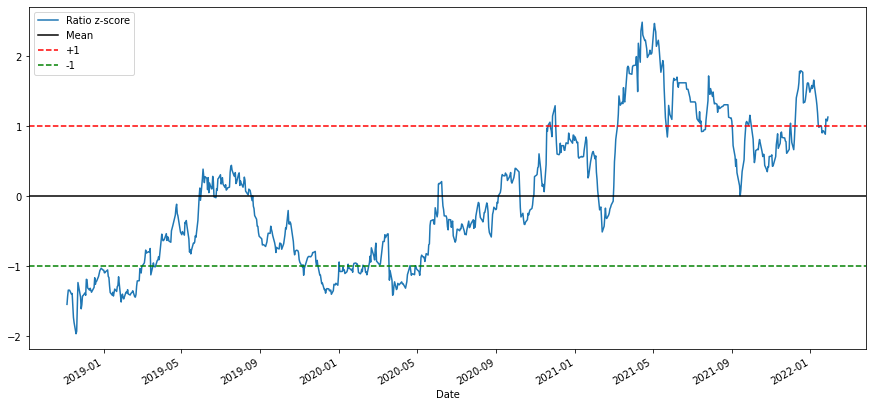

In [58]:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

In [52]:
ratios = d['ATGL.NS'] / d['ADANITRANS.NS']
print(len(ratios))
# You could split 80 / 20 for train and test, BUT we are not going to be backtesting in this project since the aim is to just go over the model.
# train = ratios[0:round(0.8*len(ratios))]
# test = ratios[round(0.8*len(ratios)):]


799


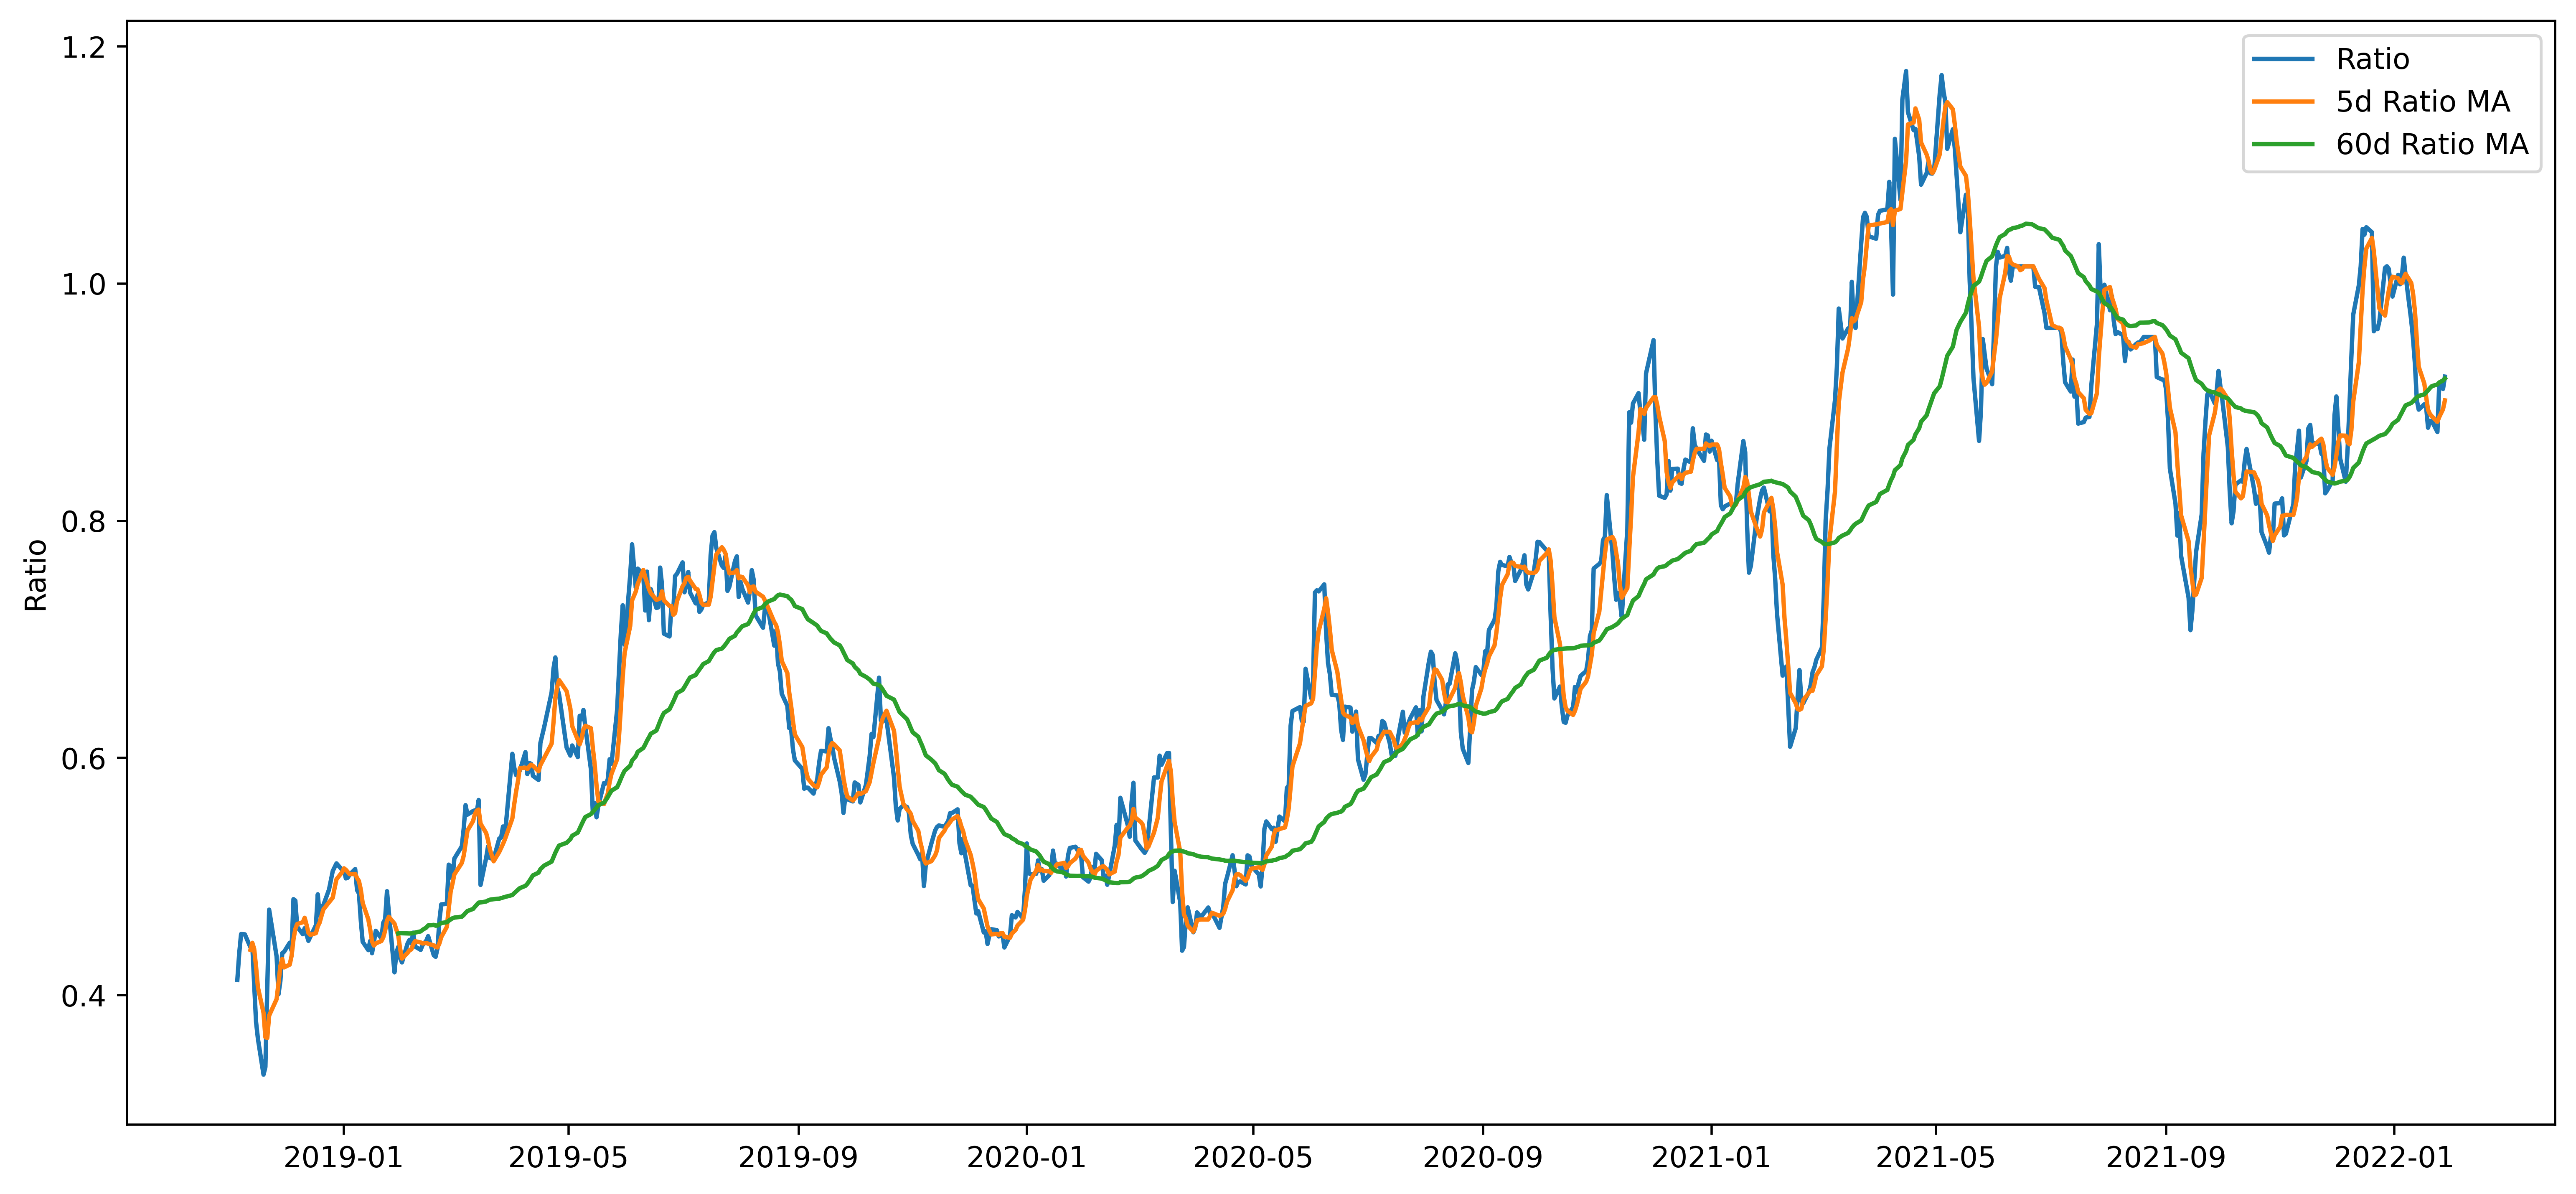

In [53]:
ratios_mavg5 = ratios.rolling(window=5,
                               center=False).mean()

ratios_mavg60 = ratios.rolling(window=60,
                               center=False).mean()

std_60 = ratios.rolling(window=60,
                        center=False).std()

zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7), dpi = 500)
plt.plot(ratios.index, ratios.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)

plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()


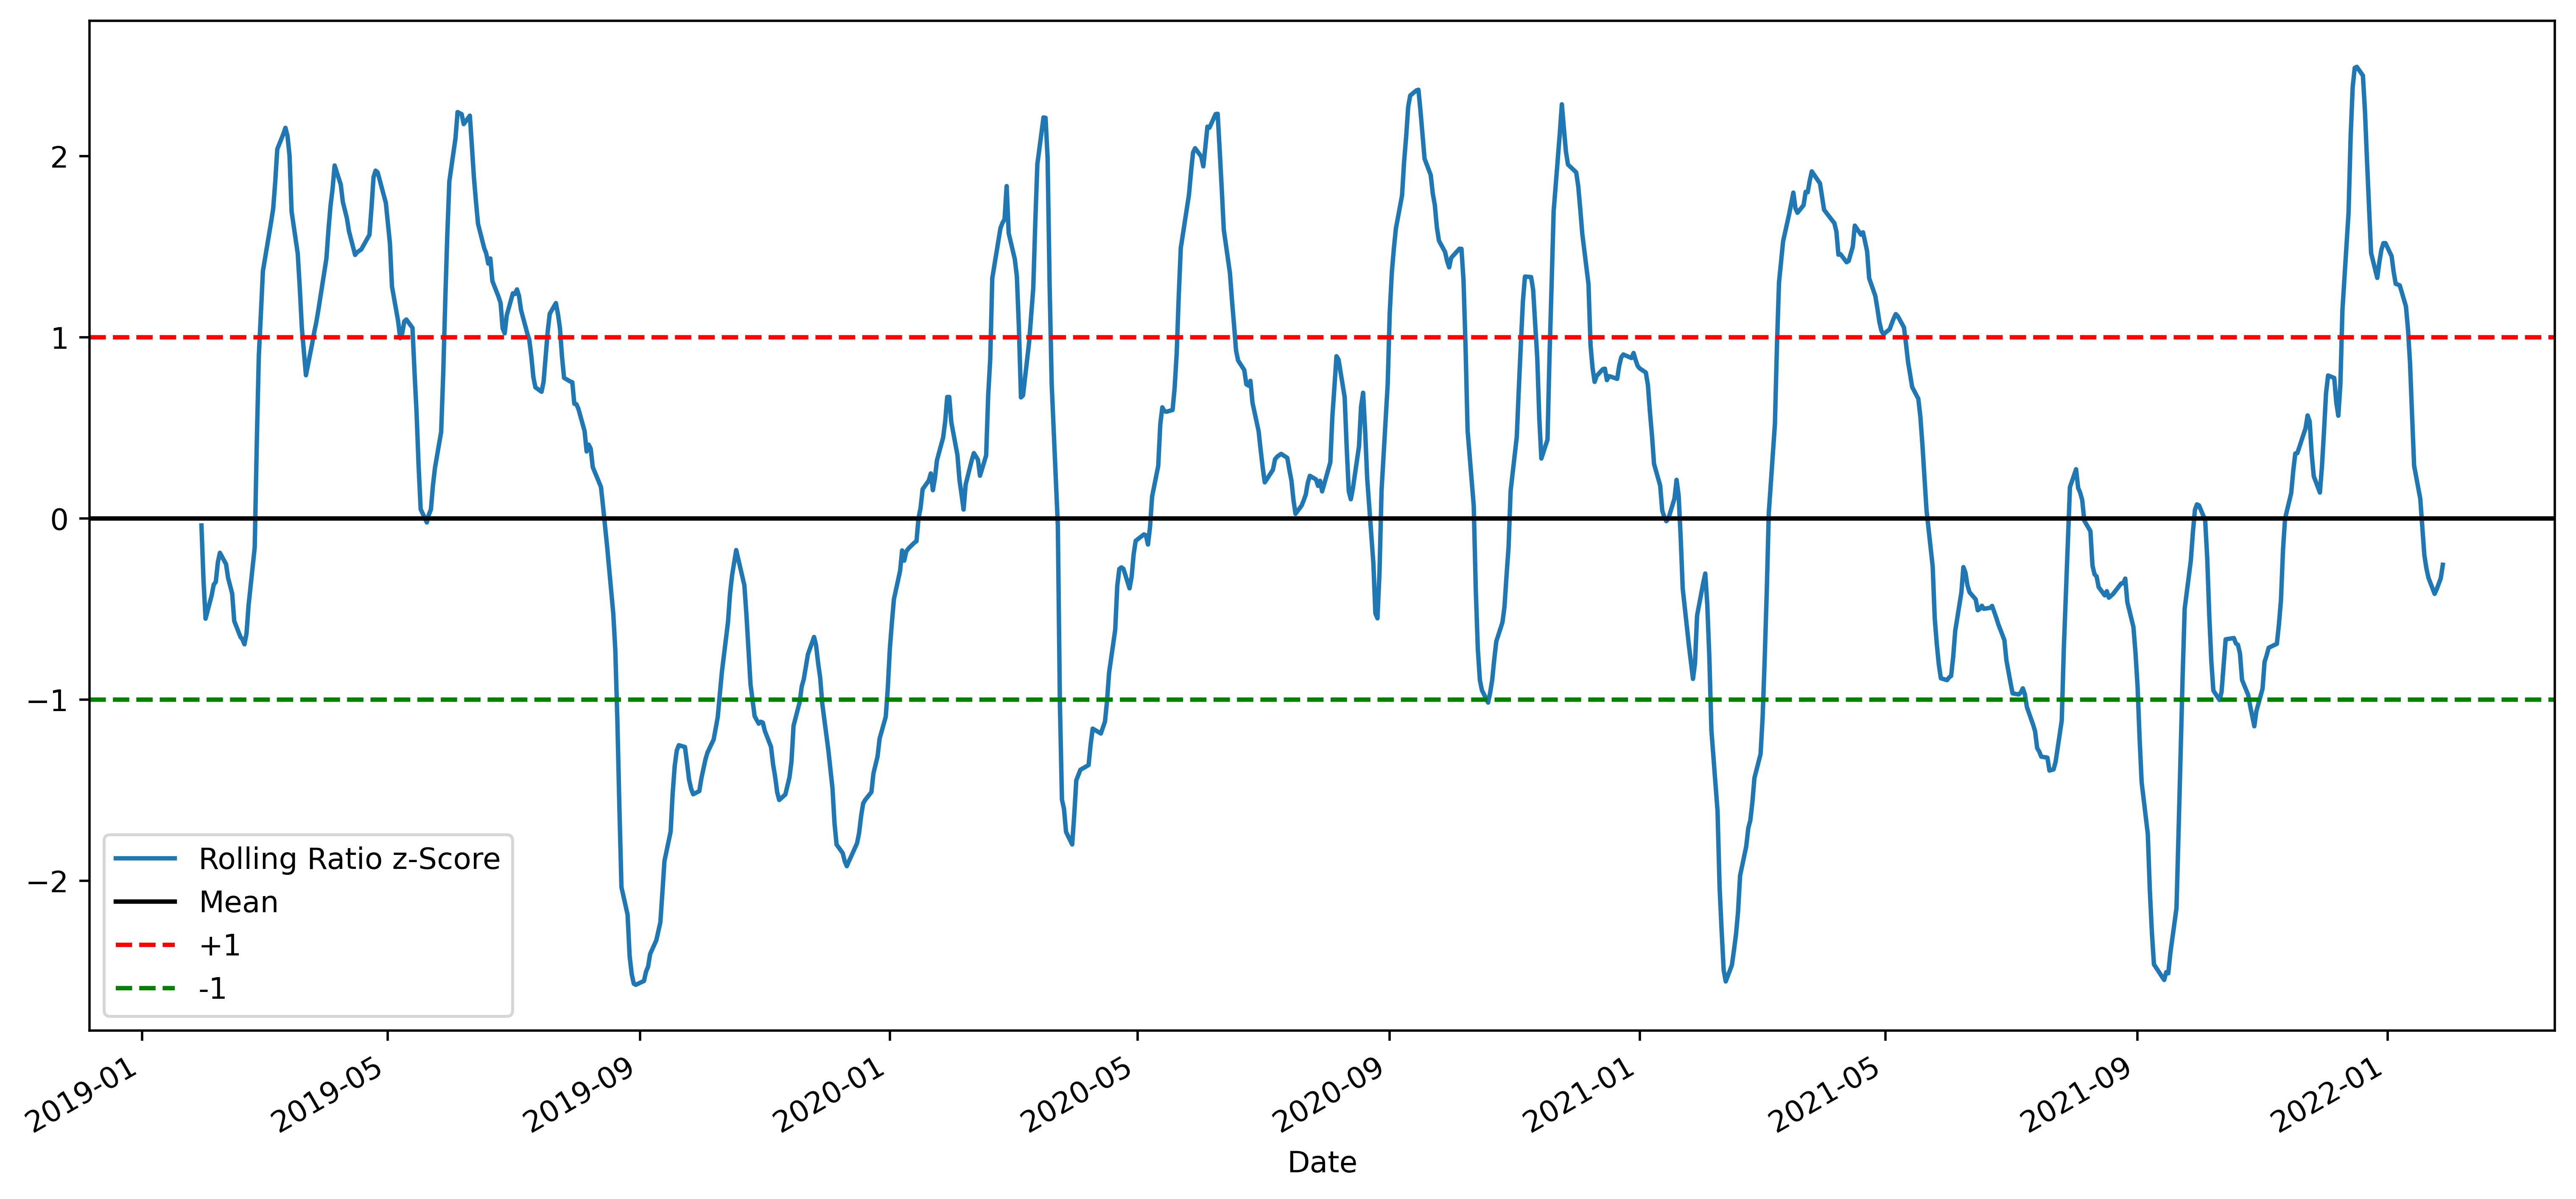

In [54]:

# Take a rolling 60 day standard deviation
std_60 = ratios.rolling(window=60,center=False).std()
std_60.name = 'std 60d'

# Compute the z score for each day
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5.name = 'z-score'

plt.figure(figsize=(15,7), dpi = 500)
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()


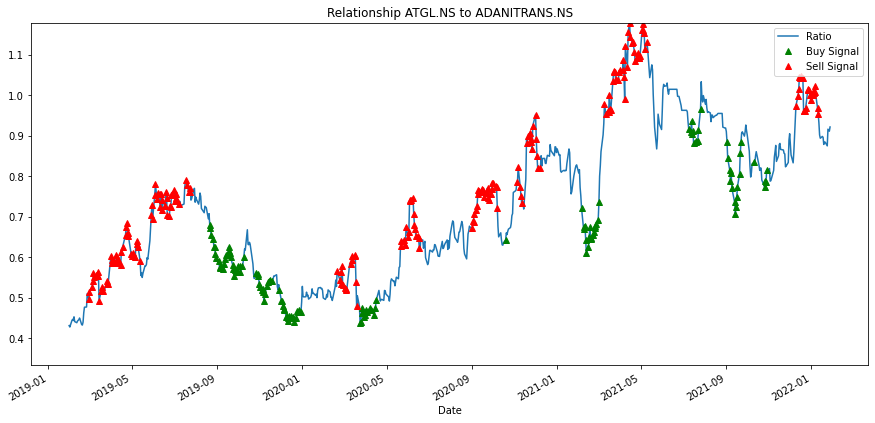

In [55]:

# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

ratios[60:].plot()
buy = ratios.copy()
sell = ratios.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship ATGL.NS to ADANITRANS.NS')
plt.show()